# Pre-process Neukom 2019 data

See [Neukom et al., 2019](https://www.nature.com/articles/s41561-019-0400-0)

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import pandas as pd
import scmdata

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
OUT_FILE = os.path.join(
    utils.DATA_DIR, "processed", "neukom2019temp", "neukom-2019-temp.nc"
)
OUT_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/neukom2019temp/neukom-2019-temp.nc'

<IPython.core.display.Javascript object>

In [5]:
SOURCE_FILE = os.path.join(
    utils.DATA_DIR, "raw", "neukom2019temp", "Full_ensemble_median_and_95pct_range.txt"
)

<IPython.core.display.Javascript object>

In [6]:
raw = pd.read_csv(
    SOURCE_FILE,
    delim_whitespace=True,
    skiprows=5,
    names=[
        "Year",
        "Cowtan & Way instrumental target",
        "Full ensemble median",
        "Full ensemble 2.5th percentile",
        "Full ensemble 97.5th percentile",
        "Cowtan & Way instrumental target 31-year filtered",
        "31-year filtered full ensemble median",
        "31-year filtered full ensemble 2.5th percentile",
        "31-year filtered full ensemble 97.5th percentile",
    ],
)
raw

Year  Cowtan & Way instrumental target  Full ensemble median  \
0        1                               NaN               -0.3690   
1        2                               NaN               -0.3548   
2        3                               NaN               -0.3120   
3        4                               NaN               -0.3041   
4        5                               NaN               -0.3034   
...    ...                               ...                   ...   
2012  2013                            0.5552                   NaN   
2013  2014                            0.6543                   NaN   
2014  2015                            0.8532                   NaN   
2015  2016                            0.8148                   NaN   
2016  2017                            0.6671                   NaN   

      Full ensemble 2.5th percentile  Full ensemble 97.5th percentile  \
0                            -0.7515                           0.0176   
1                            -0.7328                           0.0292   
2                            -0.7308                           0.0821   
3                            -0.6638                           0.1169   
4                            -0.6808                           0.0913   
...                              ...                              ...   
2012                             NaN                              NaN   
2013                             NaN                              NaN   
2014                             NaN                              NaN   
2015                             NaN                              NaN   
2016                             NaN                              NaN   

      Cowtan & Way instrumental target 31-year filtered  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2012                                                NaN   
2013                                                NaN   
2014                                                NaN   
2015                                                NaN   
2016                                                NaN   

      31-year filtered full ensemble median  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
2012                                    NaN   
2013                                    NaN   
2014                                    NaN   
2015                                    NaN   
2016                                    NaN   

      31-year filtered full ensemble 2.5th percentile  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
2012                                              NaN   
2013                                              NaN   
2014                                              NaN   
2015                                              NaN   
2016                                              NaN   

      31-year filtered full ensemble 97.5th percentile  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                           

<IPython.core.display.Javascript object>

In [7]:
out = scmdata.ScmRun(
    data=raw[
        [
            "Full ensemble median",
            "Full ensemble 2.5th percentile",
            "Full ensemble 97.5th percentile",
        ]
    ],
    index=raw["Year"],
    columns={
        "variable": "GMST",
        "percentile": [50, 2.5, 97.5],
        "unit": "K",
        "region": "World",
        "scenario": "historical",
        "model": "unspecified",
    },
)
out

<scmdata.ScmRun (timeseries: 3, timepoints: 2017)>
Time:
	Start: 0001-01-01T00:00:00
	End: 2017-01-01T00:00:00
Meta:
	                                       model  percentile region    scenario  \
	Full ensemble median             unspecified        50.0  World  historical   
	Full ensemble 2.5th percentile   unspecified         2.5  World  historical   
	Full ensemble 97.5th percentile  unspecified        97.5  World  historical   
	
	                                unit variable  
	Full ensemble median               K     GMST  
	Full ensemble 2.5th percentile     K     GMST  
	Full ensemble 97.5th percentile    K     GMST  

<IPython.core.display.Javascript object>

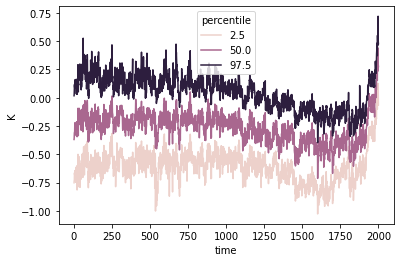

<IPython.core.display.Javascript object>

In [8]:
out.lineplot(time_axis="year", hue="percentile")

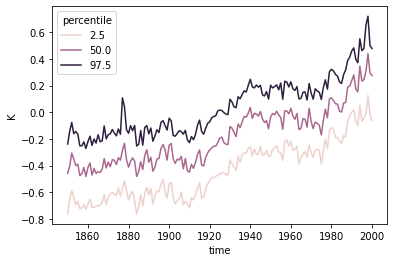

<IPython.core.display.Javascript object>

In [9]:
out.filter(year=range(1850, 3000)).lineplot(time_axis="year", hue="percentile")

In [10]:
out.filter(year=range(1961, 1990 + 1)).timeseries().mean(axis=1)

model        percentile  region  scenario    unit  variable
unspecified  50.0        World   historical  K     GMST       -0.000793
             2.5         World   historical  K     GMST       -0.234783
             97.5        World   historical  K     GMST        0.218717
dtype: float64

<IPython.core.display.Javascript object>

In [11]:
out.to_nc(OUT_FILE, dimensions=("percentile",))

<IPython.core.display.Javascript object>